In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
ANNUAL_DISCOUNT_RATE = 0.15
MONTHLY_DISCOUNT_RATE = np.power(1+ANNUAL_DISCOUNT_RATE, 1/12) - 1
print(ANNUAL_DISCOUNT_RATE)
print(MONTHLY_DISCOUNT_RATE)

0.15
0.01171491691985338


In [56]:
CONST_RETENTION_RATE = 0.56530017
AVG_RETENTION_RATE_COHORT_0 = 0.178726
ARPU = 10.45

cohort_0_changing_retention_rates = [1,0.46,0.07,0.3,0.06,0, 0, 0, 0, 0, 0, 0]
cohort_0_active_probs = np.cumprod(cohort_0_changing_retention_rates)

constant_rates_expected_lifetime = 5.29201491219346
changing_rates_expected_lifetime = 2.273317852896713

# 7a

To compute the CLV of a new customer at the beginning of month 12 with a 1 year time horizon, we will have to use revenue, active probability and discounting using the following formula

$$CLV_k = \sum_{t=0}^T\frac{v_{t,k} \cdot p_{t,k}}{(1+i)^t}$$

- $v_{t,k} =$ profit of customer k at time t $= ARPU$
- $p_{t,k} =$ active probability of customer k at time t. For this we will use the survival probability of cohort 0 using the constant rate of cohort 0 $= 0.178726 \Rightarrow p_{t,k} = r_c^{t-1}$
- $r_c = 0.178726$
- $i = \sqrt[12]{1+i_a}-1 = 0.0117$

In [57]:
def survival_prob_for_month_cobort_0(month: int):
    return np.power(AVG_RETENTION_RATE_COHORT_0, month)

def discount_factor_for_month(month: int):
    return np.power(1+MONTHLY_DISCOUNT_RATE, month)

CLV_constant_cohort_0 = sum([ARPU * survival_prob_for_month_cobort_0(month) / discount_factor_for_month(month) for month in range(12)])
CLV_changing_cohort_0 = sum([ARPU * cohort_0_active_probs[month] / discount_factor_for_month(month) for month in range(12)])
print(CLV_constant_cohort_0)
print(CLV_changing_cohort_0)

n = 10000

print("CLV for 10k new customers in month 12:", round(n * CLV_constant_cohort_0, 2))

12.692150708487054
15.633342858279223
CLV for 10k new customers in month 12: 126921.51


# 7b

For 10k new customers in month 12 we have a total customer equity of $\$ 126922$ which is *all* the profit we gain from the newly acquired customers for the coming year. Some of this profit comes from customers who stay for only one month, and some comes from customers that stay with Netflix for the whole year. In this CLV we have also assumed that all revenue is profit, i.e. that marginal costs for the new customers are 0. If we have spare capacity at this point, it's a fair assumption.

This CLV is most likely underestimated because of the strict way of applying the constant average rate of cohort 0, instead of using data from the more profitable cohorts, or using the changing rate. Using the changing rate would here actually give a larger CLV of $\$156333$ because we had more customers staying for the second month last year than the constant retention rate. However the constant rate gives the possibility for customers to stay the whole year, while in the data we had no more customers left from cohort 0 from month 4.

# 7c

We have data for one entire year. What we saw earlier was that customer loyalty increases with time, but on a much smaller amount of customers than the total acquired for the period. We have too little data in both amount of customers and in time window to estimate how the retention looks like for the longer staying customers. Using a constant retention rate would make the active probability constantly fall, and the active probability for e.g. month 18 would be too marginal and not take into account the rising retention rates.

# 7d

Exponential decay:
$$k_t = K \cdot (1-e^{-\chi \cdot t})$$
$$t>0$$

In [58]:
def k(t, chi, K=0.9):
    return K * (1-np.exp(-chi * t))

In [69]:
t = np.linspace(0,23,24)

modeled_retention_rates = ([k(t-2, 0.3) for t in range(3,24)])

#Inserting approximate values for the first two months using historical data for the first months after acquisition, and then starting the modeled exponential decay retention rates from month 3
modeled_retention_rates.insert(0, 0.12)
modeled_retention_rates.insert(0, 0.46)
modeled_retention_rates.insert(0, 1)
modeled_active_probs = np.cumprod(modeled_retention_rates)
print(modeled_retention_rates)

[1, 0.46, 0.12, 0.2332636013864539, 0.4060695275153763, 0.5340873062334607, 0.6289252092790181, 0.6991828558664132, 0.7512310006005721, 0.7897892145723163, 0.8183538420395288, 0.8395150385342253, 0.8551916384689224, 0.8668051493388841, 0.8754086497974367, 0.8817822796987761, 0.8865039808615701, 0.890001903115582, 0.892593227655882, 0.894512928091036, 0.8959350771516487, 0.8969886310882759, 0.8977691230410003, 0.898347325700674]


Submitting the first retention rate as $NaN$, but setting it to 1 for the plots to get a better visual

# 7e

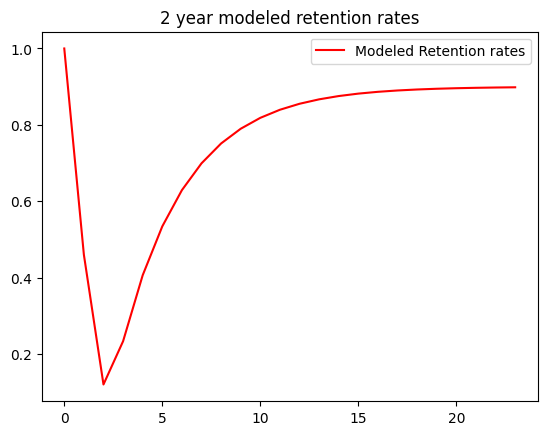

In [70]:
plt.plot(t, modeled_retention_rates, color='r', label='Modeled Retention rates')
plt.title("2 year modeled retention rates")
plt.legend()
plt.show()

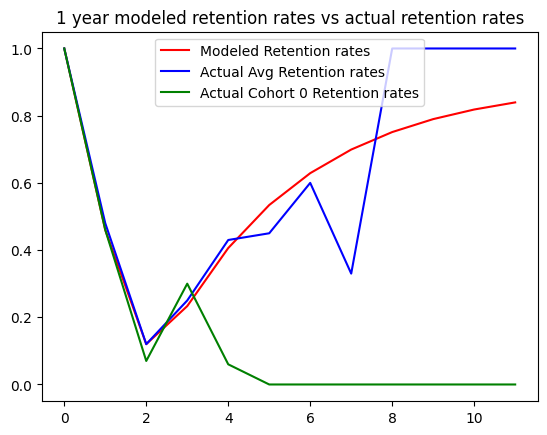

In [67]:
actual_avg_retention_rates = [1,0.48,0.12,0.25,0.43,0.45,0.6,0.33,1,1,1,1]
actual_cohort_0_retention_rates = [1,0.46,0.07,0.3,0.06,0, 0, 0, 0, 0, 0, 0]
t_1 = np.linspace(0,11,12)

plt.plot(t_1, modeled_retention_rates[:12], color='r', label='Modeled Retention rates')
plt.plot(t_1, actual_avg_retention_rates, color='b', label='Actual Avg Retention rates')
plt.plot(t_1, actual_cohort_0_retention_rates, color='g', label='Actual Cohort 0 Retention rates')
plt.title("1 year modeled retention rates vs actual retention rates")
plt.legend()
plt.show()

### Modeled vs. Average
Here we see a strong correlation, but the actual average retention rates are noisy for $x=7,8$ but still oscillates around the mean that the modeled retention rate seems to approximate.
From this we will assess the quality of the modeled rates as pretty good

### Modeled vs. Cohort 0
Here we see a big similarity for $x<=3$ from where the cohort 0 data diverges from both the average historical and the modeled, and so this can either be seen as an exception in the small data, or that cohort 0 actually always drops down to $0$ at month 5. This is however not realistic when we imagine we had bigger sample sizes. For this cohort, month 4 and 5 is indeed in the summer which we saw was the lowest levels, but with large enough sample sizes some customers would've stayed over the summer and from there the retention rates should start to rise again. This is the case for cohort 1, which is just one month after cohort 0, so we can conclude with our data being an exception.

# 7f

In [73]:
CLV_modeled_cohort_0 = sum([ARPU * modeled_active_probs[month] / discount_factor_for_month(month) for month in range(24)])
print(CLV_modeled_cohort_0)

16.05373526341549
